<a href="https://colab.research.google.com/github/gilbert-umuzi/MultiWOZ-SGD-benchmarks/blob/main/multiwoz_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGD Data Points (JGA on Unseen domains, Fine-tuned models):
                    Model    Year  Score(%)
0         T5 (Fine-tuned)  2021.5      70.0
1    Flan-T5 (Fine-tuned)  2022.8      75.0
2           SPLAT (Large)  2023.5      82.2
3  LLaMA 1/2 (Fine-tuned)  2023.5      75.0

MultiWOZ Data Points (JGA, Fine-tuned models):
            Model    Year  Score(%)
0           SUMBT  2019.5     42.40
1       SimpleTOD  2020.4     55.80
2          TripPy  2020.5     55.30
3   SPLAT (Large)  2023.5     57.40
4    NL-DST (LLM)  2025.0     65.90
5           MTTOD  2021.0     20.25
6          GALAXY  2021.0     20.50
7            HDNO  2020.0     18.85
8          TOATOD  2023.0     63.79
9            DAIR  2022.0     59.98
10           D3ST  2022.0     58.70
11        SPACE-3  2022.0     57.50
12          PPTOD  2022.0     57.45

SGD Trend Line Calculation:
Coefficients: [ 4.30552952e+00 -8.63378276e+03]
Polynomial:  
4.306 x - 8634
Annual improvement rate: 4.31%/year
SGD Forecast: 3.8 years to

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

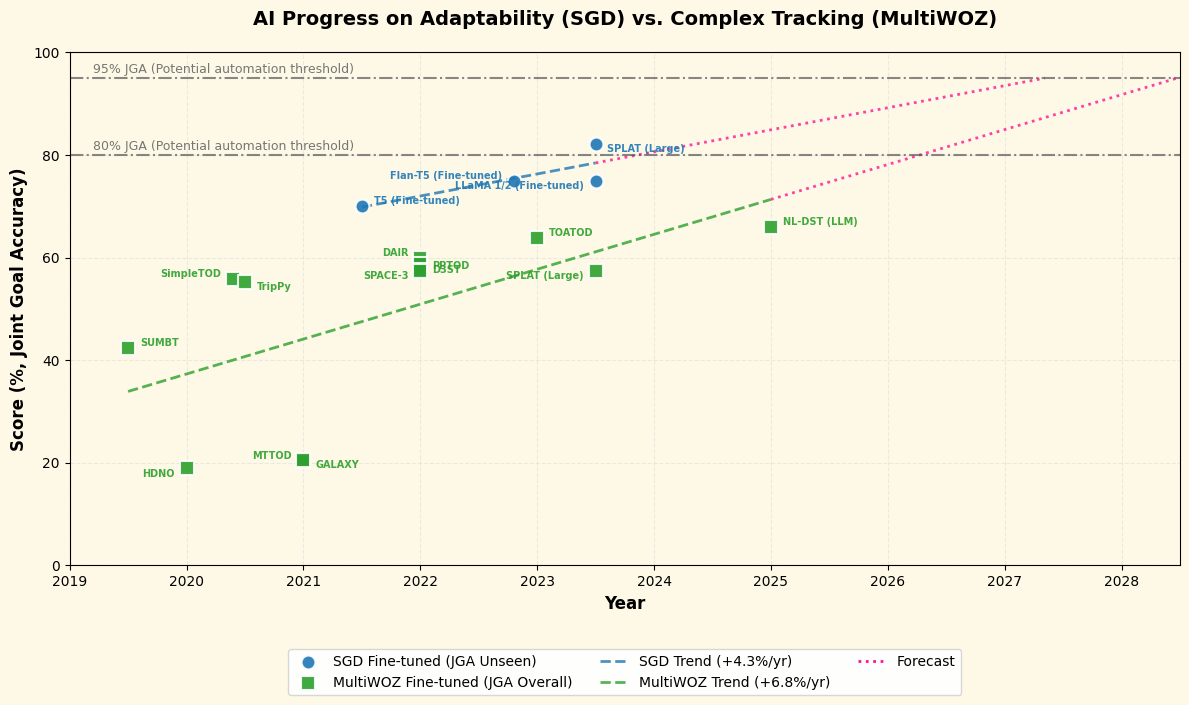

In [1]:
"""
AI Progress Visualization focusing on MultiWOZ and SGD benchmarks
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Function to create the visualization
def create_visualization(data_path, end_year, phase_number):
    """
    Create visualization for dialogue benchmarks using data from the provided CSV.

    Parameters:
    - data_path: Path to the CSV file containing benchmark data
    - end_year: The end year for the x-axis
    - phase_number: Phase number for the title
    """
    # Define color scheme and markers
    colors = {
        'sgd': '#1f77b4',      # Blue
        'multiwoz': '#2ca02c', # Green
        'forecast': '#FF1493'  # Hot pink
    }

    markers = {
        'sgd': 'o',            # Circle
        'multiwoz': 's'        # Square
    }

    # Load the data from CSV
    df = pd.read_csv(data_path)

    # Filter for each benchmark according to specifications
    sgd_df = df[(df['Benchmark'] == 'SGD') &
               (df['Metric'] == 'JGA') &
               (df['Subset'] == 'Unseen') &
               (df['Setting'].str.contains('Fine-tuned'))].reset_index(drop=True)

    multiwoz_df = df[(df['Benchmark'] == 'MultiWOZ') &
                    (df['Metric'] == 'JGA') &
                    (df['Setting'].str.contains('Fine-tuned'))].reset_index(drop=True)

    # Display the data points being used
    print("SGD Data Points (JGA on Unseen domains, Fine-tuned models):")
    print(sgd_df[['Model', 'Year', 'Score(%)']])
    print("\nMultiWOZ Data Points (JGA, Fine-tuned models):")
    print(multiwoz_df[['Model', 'Year', 'Score(%)']])

    # Create figure
    plt.figure(figsize=(12, 8))
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set background color
    bg_color = '#fef9e7'
    ax.set_facecolor(bg_color)
    fig.patch.set_facecolor(bg_color)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.6, color='#dddddd')

    # Plot data points
    ax.scatter(sgd_df['Year'], sgd_df['Score(%)'], color=colors['sgd'], marker=markers['sgd'],
               s=100, alpha=0.9, edgecolors='white', linewidth=1.5, zorder=3,
               label='SGD Fine-tuned (JGA Unseen)')

    ax.scatter(multiwoz_df['Year'], multiwoz_df['Score(%)'], color=colors['multiwoz'],
               marker=markers['multiwoz'], s=100, alpha=0.9, edgecolors='white',
               linewidth=1.5, zorder=3, label='MultiWOZ Fine-tuned (JGA Overall)')

    # Calculate trend lines if we have enough data points
    # SGD trend
    if len(sgd_df) >= 2:
        sgd_x = sgd_df['Year'].values
        sgd_y = sgd_df['Score(%)'].values
        sgd_z = np.polyfit(sgd_x, sgd_y, 1)
        sgd_p = np.poly1d(sgd_z)
        sgd_slope = sgd_z[0]  # Annual improvement rate

        # Print trend line calculation details
        print("\nSGD Trend Line Calculation:")
        print(f"Coefficients: {sgd_z}")
        print(f"Polynomial: {sgd_p}")
        print(f"Annual improvement rate: {sgd_slope:.2f}%/year")

        # Plot trend line
        x_sgd_trend = np.linspace(min(sgd_x), max(sgd_x), 100)
        ax.plot(x_sgd_trend, sgd_p(x_sgd_trend), color=colors['sgd'], linestyle='--',
                linewidth=2, label=f'SGD Trend (+{sgd_slope:.1f}%/yr)', alpha=0.8)

        # Plot forecast line if trend is positive
        if sgd_slope > 0:
            sgd_last_year = max(sgd_x)
            sgd_last_score = sgd_p(sgd_last_year)
            years_to_95 = (95 - sgd_last_score) / sgd_slope
            sgd_forecast_year = min(sgd_last_year + years_to_95, 2035)

            print(f"SGD Forecast: {years_to_95:.1f} years to reach 95% threshold (year {sgd_last_year + years_to_95:.1f})")

            x_sgd_forecast = np.linspace(max(sgd_x), min(end_year, sgd_forecast_year), 100)
            ax.plot(x_sgd_forecast, sgd_p(x_sgd_forecast), color=colors['forecast'],
                    linestyle=':', linewidth=2, alpha=0.8)

    # MultiWOZ trend
    if len(multiwoz_df) >= 2:
        mwz_x = multiwoz_df['Year'].values
        mwz_y = multiwoz_df['Score(%)'].values
        mwz_z = np.polyfit(mwz_x, mwz_y, 1)
        mwz_p = np.poly1d(mwz_z)
        mwz_slope = mwz_z[0]  # Annual improvement rate

        # Print trend line calculation details
        print("\nMultiWOZ Trend Line Calculation:")
        print(f"Coefficients: {mwz_z}")
        print(f"Polynomial: {mwz_p}")
        print(f"Annual improvement rate: {mwz_slope:.2f}%/year")

        # Plot trend line
        x_mwz_trend = np.linspace(min(mwz_x), max(mwz_x), 100)
        ax.plot(x_mwz_trend, mwz_p(x_mwz_trend), color=colors['multiwoz'], linestyle='--',
                linewidth=2, label=f'MultiWOZ Trend (+{mwz_slope:.1f}%/yr)', alpha=0.8)

        # Plot forecast line if trend is positive
        if mwz_slope > 0:
            mwz_last_year = max(mwz_x)
            mwz_last_score = mwz_p(mwz_last_year)
            years_to_95 = (95 - mwz_last_score) / mwz_slope
            mwz_forecast_year = min(mwz_last_year + years_to_95, 2035)

            print(f"MultiWOZ Forecast: {years_to_95:.1f} years to reach 95% threshold (year {mwz_last_year + years_to_95:.1f})")

            x_mwz_forecast = np.linspace(max(mwz_x), min(end_year, mwz_forecast_year), 100)
            ax.plot(x_mwz_forecast, mwz_p(x_mwz_forecast), color=colors['forecast'],
                    linestyle=':', linewidth=2, alpha=0.8)

    # Simple offset pattern for labels to reduce overlap
    def get_offset(i):
        offsets = [(0.1, 1.0), (-0.1, 1.0), (0.1, -1.0), (-0.1, -1.0)]
        return offsets[i % len(offsets)]

    # Label SGD points
    for i, row in sgd_df.sort_values('Year').iterrows():
        offset_x, offset_y = get_offset(i)
        ax.annotate(row['Model'], (row['Year'] + offset_x, row['Score(%)'] + offset_y),
                   fontsize=7, color=colors['sgd'], fontweight='bold', alpha=0.9,
                   ha='left' if offset_x > 0 else 'right', va='center', zorder=4)

    # Label MultiWOZ points
    for i, row in multiwoz_df.sort_values('Year').iterrows():
        offset_x, offset_y = get_offset(i)
        ax.annotate(row['Model'], (row['Year'] + offset_x, row['Score(%)'] + offset_y),
                   fontsize=7, color=colors['multiwoz'], fontweight='bold', alpha=0.9,
                   ha='left' if offset_x > 0 else 'right', va='center', zorder=4)

    # Add 80% threshold line
    ax.axhline(y=80, color='#555555', linestyle='-.', alpha=0.7, linewidth=1.5)
    ax.text(2019.2, 81, "80% JGA (Potential automation threshold)",
            fontsize=9, color='#555555', alpha=0.8)

    # Add 95% threshold line
    ax.axhline(y=95, color='#555555', linestyle='-.', alpha=0.7, linewidth=1.5)
    ax.text(2019.2, 96, "95% JGA (Potential automation threshold)",
            fontsize=9, color='#555555', alpha=0.8)

    # Set axis limits
    ax.set_xlim(2019, end_year)
    ax.set_ylim(0, 100)

    # Set up x-axis with every year labeled
    years = np.arange(2019, int(end_year) + 1).astype(int)
    ax.set_xticks(years)
    ax.set_xticklabels(years, fontsize=10)

    # Set title and labels
    ax.set_title(f"AI Progress on Adaptability (SGD) vs. Complex Tracking (MultiWOZ)",
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('Score (%, Joint Goal Accuracy)', fontsize=12, fontweight='bold')

    # Add forecast line to legend
    forecast_line = Line2D([0], [0], color=colors['forecast'], linestyle=':',
                           linewidth=2, label='Forecast')

    # Create legend
    handles, labels = ax.get_legend_handles_labels()
    handles.append(forecast_line)

    legend = ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.15),
                      frameon=True, framealpha=0.9, edgecolor='lightgray',
                      fontsize=10, ncol=3)
    legend.get_frame().set_facecolor('white')

    # Adjust layout
    plt.subplots_adjust(bottom=0.20)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    return fig

# Create all four phases with different end years
def main():
    data_path = "multiwoz_sgd.csv"
    phase_end_years = [2025.5, 2026, 2027, 2028.5]

    for i, end_year in enumerate(phase_end_years, 1):
        fig = create_visualization(data_path, end_year, i)
        plt.savefig(f'phase_{i}_visualization.png', dpi=300, bbox_inches='tight')
        plt.close(fig)

        print(f"\nCreated Phase {i} visualization (up to {end_year})")

    # Display the final phase visualization
    final_fig = create_visualization(data_path, phase_end_years[-1], len(phase_end_years))
    plt.show()

if __name__ == "__main__":
    main()